In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import kstest, norm

Generate some data.

In [2]:
num_data = 3 
data = norm(1, 1).rvs(num_data)

print(data)

[ 1.15722037  0.23405238 -1.86095757]


We will now test if this data came from a standard normal distribution. (We already no that it didn't, because of how we generated it.)

In [3]:
def empirical(x, data):
    X = np.tile(x, len(data)).reshape(len(data),len(x))
    return np.sum(X.T>data, axis=1)/len(data)

def stat(dist, data):
    x = np.linspace(-6, 6, 1000)
    D = empirical(x, data) - dist.cdf(x)
    Dn = np.max(np.abs(D))
    x_star = x[np.argmax(np.abs(D))]
    return Dn, x_star

In [4]:
dist = norm()

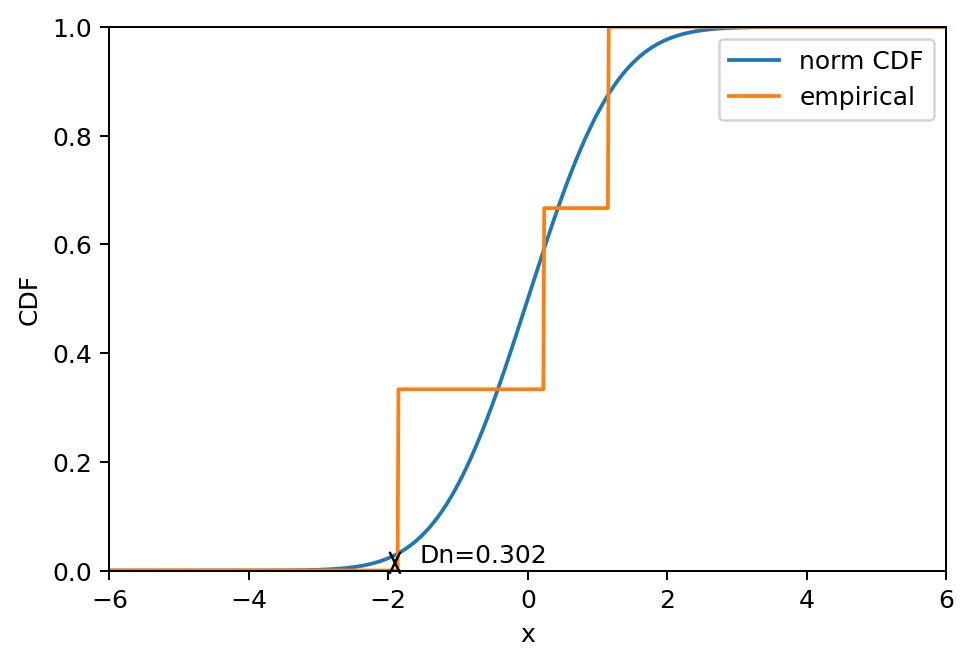

statistic Dn = 0.3015962800523874


In [5]:
Dn, x_star = stat(dist, data)

fig, ax = plt.subplots(dpi=180)

x = np.linspace(-6, 6, 1000)
ax.plot(x, dist.cdf(x), label='norm CDF')
ax.plot(x, empirical(x, data), label='empirical')

eps = 0.05
plt.annotate('', xy=(x_star-eps,empirical(np.array([x_star-eps]), data)[0]),              
             xytext=(x_star-eps,dist.cdf(x_star-eps)), 
             arrowprops=dict(arrowstyle='<->'))
plt.annotate('Dn={:.3f}'.format(Dn), 
             xy=(x_star+0.3,
                 0.5*(dist.cdf(x_star-eps)+empirical(np.array([x_star-eps]), data)[0])))

ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)

ax.set_xlabel('x')
ax.set_ylabel('CDF')

plt.legend()
plt.show()

print("statistic Dn =", Dn)

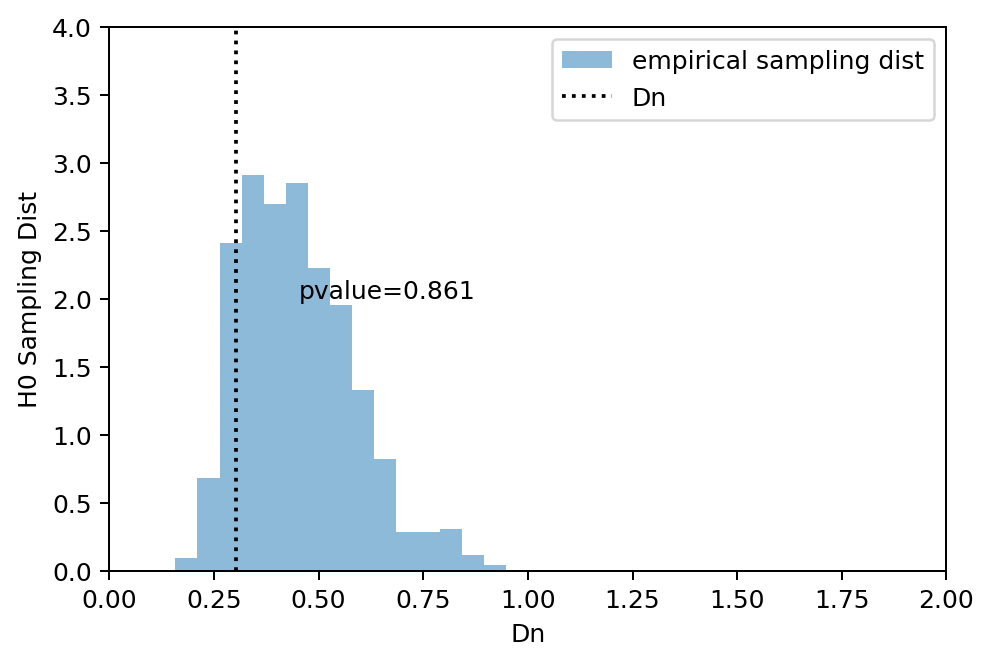

In [6]:
num_trials = 1000

samples = np.zeros(num_trials)
for i in range(num_trials):
    mock_data = dist.rvs(size=len(data))
    samples[i], _ = stat(dist, mock_data)


fig, ax = plt.subplots(dpi=180)

bins = np.linspace(0, 1, 20)
ax.hist(samples, bins=bins, alpha=0.5, density=True,
        label='empirical sampling dist')

ax.axvline(Dn, color='k', linestyle=':', label='Dn')

pvalue = np.sum(samples>Dn)/num_trials
plt.annotate('pvalue={:.3f}'.format(pvalue), 
             xy=(1.5*Dn, 2))


ax.set_xlim(0, 2)
ax.set_ylim(0, 4)

ax.set_xlabel('Dn')
ax.set_ylabel('H0 Sampling Dist')

plt.legend()
plt.show()

Of course, the test is also implemented for you in `scipy.stats`.

If the number of data points, $n$, is large (i.e. as $n\rightarrow\infty$) then under the null hypothesis, the statistic $\sqrt{n}D_n$ follows a distribution that does not depend of the details of the distribution being tested (in this case, the normal distribution). This distribition is known as the _Kolmogorov distribution_. 

This allows the KS test to be performed without needing to sample numerically the distribution of the statistic under the null hypothesis. This makes the test fast. This is the approach followed by the implementation in `scipy.stats`.

In [7]:
kstest(data, dist.cdf)

KstestResult(statistic=0.30195824859126214, pvalue=0.8811351184179927)

# Notes
- What has been described here is the "one-sample" KS test, where sampled data from one distribution is compared against the CDF of a given distribution. There is also a "two-sample" version of the KS test where two sets of sampled data are compared to test if the underlying distributions are the same.
- What has been described here is the "two-sided" KS test, where the null hypothesis is that the two distributions are identical (the alternative hypothesis is that the two distributions are not identical). There are also "one-sided" versions of the KS where the null hypothesis is that the CDF of dist 1, $C_1(x)$, is greater/less than or equal to the CDF of dist 2, $C_2(x)$, for all $x$ (the alternative hypothesis is that $C_1(x) \substack{<\\>} C_2(x)$ for some values of $x$.